# Machine Learning Tool for Financial Statement Audit

In [4]:
import tabula
import pandas as pd
import seaborn as sns

## 1) Pdf Table to Dataframe

### Asset Table

In [5]:
df = tabula.read_pdf('THYAO.pdf', pages='1')
for value in df:
    asset_df = pd.DataFrame(value)
asset_df = asset_df.dropna(axis=1, how = 'all')
asset_df = asset_df.dropna(axis=0, how = 'all')
asset_df = asset_df.drop(['Notes'], axis = 1)
asset_df = asset_df.T
asset_df.reset_index(inplace=True)
asset_df.columns = asset_df.values[0]
asset_df = asset_df.iloc[1:]
#asset_df = asset_df.rename(columns={'ASSETS': 'Date'})
asset_df = asset_df.replace('\.','',regex=True).replace('\(','',regex=True).replace('\)','',regex=True)
asset_df = asset_df.fillna(0)
asset_df = asset_df.replace('-',0)
#asset_df = asset_df.set_index('ASSETS')
asset_df.iloc[:,1:] = asset_df.iloc[:,1:].astype('int')
asset_df

,ASSETS,Non-Current Assets,Financial Investments,Other Receivables,-Third Parties,Investments Accounted by Using Equity Method,Invesment Property,Property and Equipment,Right of Use Assets,Intangible Assets,...,Other Receivables,-Related Parties,-Third Parties,Derivative Financial Instruments,Inventories,Prepaid Expenses,Current Income Tax Assets,Other Current Assets,TOTAL CURRENT ASSETS,TOTAL ASSETS
1,30 September 2019,0,500,0,6800,2087,0,87436,8190,0,...,0,23,6800,492,1589,5050,213,683,24918,135503
2,31 December 2018,0,454,0,5280,1884,2,73219,0,0,...,0,10,5280,299,1000,4037,318,520,23706,109076


In [6]:
for index,key in enumerate(asset_df):
    if key == 'Trade Receivables' and asset_df.iloc[:, index + 1].name == '-Related Parties' and asset_df.iloc[:, index + 2].name =='-Third Parties':
        asset_df.iloc[:,index] = sum(asset_df.iloc[:, index + 1].values,asset_df.iloc[:, index + 2].values)
asset_df['Trade Receivables']

1    6833
2    5313
Name: Trade Receivables, dtype: int32

### Liabilities Table

In [7]:
df = tabula.read_pdf('THYAO.pdf', pages='2')
for value in df:
    liabilites_df = pd.DataFrame(value)
liabilites_df = liabilites_df.dropna(axis=1, how = 'all')
liabilites_df = liabilites_df.dropna(axis=0, how = 'all')
liabilites_df = liabilites_df.drop(['Notes'], axis = 1)
liabilites_df = liabilites_df.T
liabilites_df.reset_index(inplace=True)
liabilites_df.columns = liabilites_df.values[0]
liabilites_df = liabilites_df.iloc[1:]
#liabilites_df = liabilites_df.rename(columns={'LIABILITIES': 'Date'})
liabilites_df = liabilites_df.replace('\.','',regex=True).replace('\(','',regex=True).replace('\)','',regex=True)
liabilites_df = liabilites_df.fillna(0)
liabilites_df = liabilites_df.replace('-',0)
#liabilites_df = liabilites_df.set_index('LIABILITIES')
liabilites_df.iloc[:,1:] = liabilites_df.iloc[:,1:].astype('int')
liabilites_df

,LIABILITIES,Equity,Share Capital,Inflation Adjustment on Share Capital Items That Will,Profit or Loss\r-Actuarial (Losses) on Retirement Pay Obligation,Items That Are or May Be Reclassified to,Profit or Loss,-Foreign Currency Translation Differences,-Fair Value Gains on Hedging Instruments Entered into\rfor Cash Flow Hedges,-Gains on Remeasuring FVOCI,...,Other Payables,-Third Parties,Derivative Financial Instruments,Deferred Income,Short-Term Provisions,-Provisions for Employee Benefits,-Other Provisions,Other Current Liabilities,TOTAL CURRENT LIABILITIES,TOTAL LIABILITIES AND EQUITY
1,30 September 2019,0,1380,1124,220,0,0,18959,1480,7,...,0,177,759,698,0,785,229,1588,33577,135503
2,31 December 2018,0,1380,1124,184,0,0,0,0,37,...,0,188,1033,342,0,685,0,1087,27246,109076


### Income Statement Table

In [8]:
df = tabula.read_pdf('THYAO.pdf', pages='3')
for value in df:
    income_df = pd.DataFrame(value)
income_df = income_df.dropna(axis=1, how = 'all')
income_df = income_df.dropna(axis=0, how = 'all')
income_df = income_df.drop(['Notes'], axis = 1)
income_df = income_df.T
income_df.reset_index(inplace=True)
income_df.columns = income_df.values[0]
income_df = income_df.iloc[1:]
# income_df = income_df.rename(columns={'PROFIT OR LOSS': 'Date'})
income_df = income_df.replace('\.','',regex=True).replace('\(','',regex=True).replace('\)','',regex=True)
income_df = income_df.fillna(0)
income_df = income_df.replace('-',0)
#income_df = income_df.set_index('PROFIT OR LOSS')
income_df.iloc[:,1:] = income_df.iloc[:,1:].astype('int')
income_df

,PROFIT OR LOSS,Revenue,Cost of Sales (-),GROSS PROFIT,General Administrative Expenses (-),Marketing and Sales Expenses (-),Other Operating Income,Other Operating Expenses (-),OPERATING (LOSS) / PROFIT BEFORE INVESTMENT,Income from Investment Activities,Expenses from Investment Activities,Share of Investments' Profit Accounted by Using The Equity,OPERATING (LOSS) / PROFIT,Financial Income,Financial Expenses (-),(LOSS) / PROFIT BEFORE TAX,Tax Income / (Expense),Current Tax Income / (Expense),Deferred Tax Expense,NET (LOSS) / PROFIT FOR THE PERIOD
1,30 September 2019,56151,46118,10033,1252,6210,802,294,3079,660,447,461,3753,316,1301,2768,181,0,181,2587
2,31 December 2018,46367,34764,11603,927,4560,528,695,5949,884,4,686,7515,317,2871,4961,878,254,624,4083


##  2) Excel To Dataframe

### Asset Table

In [9]:
asset_df = pd.read_excel("THYAO.xlsx", sheet_name = 0)
asset_df = asset_df.dropna(axis=1, how = 'all')
asset_df = asset_df.dropna(axis=0, how = 'all')
asset_df = asset_df.drop(['Notes'], axis = 1)
asset_df = asset_df.T
asset_df.reset_index(inplace=True)
asset_df.columns = asset_df.values[0]
asset_df = asset_df.iloc[1:]
#asset_df = asset_df.rename(columns={'ASSETS': 'Date'})
asset_df = asset_df.fillna(0)
asset_df = asset_df.replace('-',0)
#asset_df = asset_df.set_index('ASSETS')
asset_df.iloc[:,1:] = asset_df.iloc[:,1:].astype('int')
asset_df

,ASSETS,Non-Current Assets,Financial Investments,Other Receivables,-Third Parties,Investments Accounted by Using Equity Method,Invesment Property,Property and Equipment,Right of Use Assets,Intangible Assets,...,Other Receivables,-Related Parties,-Third Parties,Derivative Financial Instruments,Inventories,Prepaid Expenses,Current Income Tax Assets,Other Current Assets,TOTAL CURRENT ASSETS,TOTAL ASSETS
1,30 September 2019,0,500,0,6800,2087,0,87436,8190,0,...,0,23,6800,492,1589,5050,213,683,24918,135503
2,31 December 2018,0,454,0,5280,1884,2,73219,0,0,...,0,10,5280,299,1000,4037,318,520,23706,109076


In [10]:
for index,key in enumerate(asset_df):
    if key == 'Trade Receivables' and asset_df.iloc[:, index + 1].name == '-Related Parties' and asset_df.iloc[:, index + 2].name =='-Third Parties':
        asset_df.iloc[:,index] = sum(asset_df.iloc[:, index + 1].values,asset_df.iloc[:, index + 2].values)
asset_df['Trade Receivables']

1    6833
2    5313
Name: Trade Receivables, dtype: int32

### Liabilities Table

In [11]:
liabilites_df = pd.read_excel("THYAO.xlsx", sheet_name = 1)
liabilites_df = liabilites_df.dropna(axis=1, how = 'all')
liabilites_df = liabilites_df.dropna(axis=0, how = 'all')
liabilites_df = liabilites_df.drop(['Notes'], axis = 1)
liabilites_df = liabilites_df.T
liabilites_df.reset_index(inplace=True)
liabilites_df.columns = liabilites_df.values[0]
liabilites_df = liabilites_df.iloc[1:]
#liabilites_df = liabilites_df.rename(columns={'LIABILITIES': 'Date'})
liabilites_df = liabilites_df.replace('\.','',regex=True).replace('\(','',regex=True).replace('\)','',regex=True)
liabilites_df = liabilites_df.fillna(0)
liabilites_df = liabilites_df.replace('-',0)
#liabilites_df = liabilites_df.set_index('LIABILITIES')
liabilites_df.iloc[:,1:] = liabilites_df.iloc[:,1:].astype('int').abs()
liabilites_df

,LIABILITIES,Equity,Share Capital,Inflation Adjustment on Share Capital Items That Will Not Be Reclassified to,Profit or Loss\n-Actuarial (Losses) on Retirement Pay Obligation,Items That Are or May Be Reclassified to,Profit or Loss,-Foreign Currency Translation Differences,-Fair Value Gains on Hedging Instruments Entered into for Cash Flow Hedges,-Gains on Remeasuring FVOCI,...,Other Payables,-Third Parties,Derivative Financial Instruments,Deferred Income,Short-Term Provisions,-Provisions for Employee Benefits,-Other Provisions,Other Current Liabilities,TOTAL CURRENT LIABILITIES,TOTAL LIABILITIES AND EQUITY
1,30 September 2019,0,1380,1124,220,0,0,18959,1480,7,...,0,177,759,698,0,785,229,1588,33577,135503
2,31 December 2018,0,1380,1124,184,0,0,0,0,37,...,0,188,1033,342,0,685,0,1087,27246,109076


### Income Statement Table

In [12]:

income_df = pd.read_excel("THYAO.xlsx", sheet_name = 2,index_col=None)
income_df = income_df.dropna(axis=1, how = 'all')
income_df = income_df.dropna(axis=0, how = 'all')
income_df = income_df.drop(['Notes'], axis = 1)
income_df = income_df.T
income_df.reset_index(inplace=True)
income_df.columns = income_df.values[0]
income_df = income_df.iloc[1:]
income_df = income_df.fillna(0)
income_df = income_df.replace('-',0)
income_df.iloc[:,1:] = income_df.iloc[:,1:].astype('int').abs()
# income_df = income_df.set_index('PROFIT OR LOSS')
income_df

,PROFIT OR LOSS,Revenue,Cost of Sales (-),GROSS PROFIT,General Administrative Expenses (-),Marketing and Sales Expenses (-),Other Operating Income,Other Operating Expenses (-),OPERATING (LOSS) / PROFIT BEFORE INVESTMENT ACTIVITIES,Income from Investment Activities,Expenses from Investment Activities,Share of Investments' Profit Accounted by Using The Equity Method,OPERATING (LOSS) / PROFIT,Financial Income,Financial Expenses (-),(LOSS) / PROFIT BEFORE TAX,Tax Income / (Expense),Current Tax Income / (Expense),Deferred Tax Expense,NET (LOSS) / PROFIT FOR THE PERIOD
1,30 September 2019,56151,46118,10033,1252,6210,802,294,3079,660,447,461,3753,316,1301,2768,181,0,181,2587
2,31 December 2018,46367,34764,11603,927,4560,528,695,5949,884,4,686,7515,317,2871,4961,878,254,624,4083


### Ratio Table

In [13]:
ratio_analysis_bs = pd.DataFrame(asset_df['ASSETS'])
ratio_analysis_bs = ratio_analysis_bs.rename(columns = {'ASSETS':'Date'})
ratio_analysis_bs

,Date
1,30 September 2019
2,31 December 2018


In [14]:
current_assets = asset_df['TOTAL CURRENT ASSETS']
current_liabilities = liabilites_df['TOTAL CURRENT LIABILITIES']
working_capital = current_assets - current_liabilities
working_capital
ratio_analysis_bs['Working Capital'] = working_capital # copy columns of dataframe
ratio_analysis_bs

,Date,Working Capital
1,30 September 2019,-8659
2,31 December 2018,-3540


In [15]:
total_sales = income_df['Revenue']
working_capital_per_dollar_of_sales = working_capital / total_sales
ratio_analysis_bs['Working Capital per Dollar of Sales'] = working_capital # copy columns of dataframe
ratio_analysis_bs

,Date,Working Capital,Working Capital per Dollar of Sales
1,30 September 2019,-8659,-8659
2,31 December 2018,-3540,-3540


In [16]:
current_ratio = current_assets / current_liabilities
ratio_analysis_bs['Current Ratio'] = current_ratio
ratio_analysis_bs

,Date,Working Capital,Working Capital per Dollar of Sales,Current Ratio
1,30 September 2019,-8659,-8659,0.742115
2,31 December 2018,-3540,-3540,0.870073


In [17]:
inventory = asset_df['Inventories']
quick_current_ratio = (current_assets - inventory) / current_liabilities
ratio_analysis_bs['Quick Current Ratio'] = quick_current_ratio
ratio_analysis_bs

,Date,Working Capital,Working Capital per Dollar of Sales,Current Ratio,Quick Current Ratio
1,30 September 2019,-8659,-8659,0.742115,0.694791
2,31 December 2018,-3540,-3540,0.870073,0.833370


In [18]:
total_liabilities = liabilites_df['TOTAL CURRENT LIABILITIES'] + liabilites_df['TOTAL NON-CURRENT LIABILITIES']
shareholders_equity = asset_df['TOTAL ASSETS'] - total_liabilities
debt2equity_ratio = total_liabilities / shareholders_equity
ratio_analysis_bs['Debt to Equity Ratio'] = debt2equity_ratio
ratio_analysis_bs

,Date,Working Capital,Working Capital per Dollar of Sales,Current Ratio,Quick Current Ratio,Debt to Equity Ratio
1,30 September 2019,-8659,-8659,0.742115,0.694791,2.610717
2,31 December 2018,-3540,-3540,0.870073,0.833370,2.486639


In [19]:
net_credit_sales = income_df['NET (LOSS) / PROFIT FOR THE PERIOD']
try:
    average_net_receivables_for_the_period = (asset_df['Trade Receivables'][1] + asset_df['Trade Receivables'][2]) / 2
except:
    average_net_receivables_for_the_period = (asset_df['Trade Receivables'][0] + asset_df['Trade Receivables'][1]) / 2
receivable_turnover = net_credit_sales / average_net_receivables_for_the_period
ratio_analysis_bs['Receivable Turnover'] = receivable_turnover
ratio_analysis_bs

,Date,Working Capital,Working Capital per Dollar of Sales,Current Ratio,Quick Current Ratio,Debt to Equity Ratio,Receivable Turnover
1,30 September 2019,-8659,-8659,0.742115,0.694791,2.610717,0.425984
2,31 December 2018,-3540,-3540,0.870073,0.833370,2.486639,0.672320


In [20]:
number_of_days_in_period = 365
average_age_of_receivables = number_of_days_in_period / receivable_turnover
ratio_analysis_bs['Average Age of Receivables'] = average_age_of_receivables
ratio_analysis_bs

,Date,Working Capital,Working Capital per Dollar of Sales,Current Ratio,Quick Current Ratio,Debt to Equity Ratio,Receivable Turnover,Average Age of Receivables
1,30 September 2019,-8659,-8659,0.742115,0.694791,2.610717,0.425984,856.839969
2,31 December 2018,-3540,-3540,0.870073,0.833370,2.486639,0.672320,542.896155


In [21]:
cost_of_goods_sold = income_df['Cost of Sales (-)']
average_inventory_for_the_period = inventory
inventory_turnover = cost_of_goods_sold / average_inventory_for_the_period
ratio_analysis_bs['Inventory Turnover'] = inventory_turnover
ratio_analysis_bs

,Date,Working Capital,Working Capital per Dollar of Sales,Current Ratio,Quick Current Ratio,Debt to Equity Ratio,Receivable Turnover,Average Age of Receivables,Inventory Turnover
1,30 September 2019,-8659,-8659,0.742115,0.694791,2.610717,0.425984,856.839969,29.023285
2,31 December 2018,-3540,-3540,0.870073,0.833370,2.486639,0.672320,542.896155,34.764000


In [22]:
number_of_days_for_inventory_to_turn = number_of_days_in_period / inventory_turnover
ratio_analysis_bs['Number of Days for Inventory to Turn'] = number_of_days_for_inventory_to_turn
ratio_analysis_bs

,Date,Working Capital,Working Capital per Dollar of Sales,Current Ratio,Quick Current Ratio,Debt to Equity Ratio,Receivable Turnover,Average Age of Receivables,Inventory Turnover,Number of Days for Inventory to Turn
1,30 September 2019,-8659,-8659,0.742115,0.694791,2.610717,0.425984,856.839969,29.023285,12.576109
2,31 December 2018,-3540,-3540,0.870073,0.833370,2.486639,0.672320,542.896155,34.764000,10.499367


In [23]:
ratio_analysis_is = pd.DataFrame(asset_df['ASSETS'])
ratio_analysis_is = ratio_analysis_is.rename(columns = {'ASSETS':'Date'})
ratio_analysis_is

,Date
1,30 September 2019
2,31 December 2018


In [24]:
revenue = income_df['Revenue']
cost_of_goods_sold = income_df['Cost of Sales (-)']
gross_profit_margin = (revenue - cost_of_goods_sold) / revenue
ratio_analysis_is['Gross Profit Margin'] = gross_profit_margin * 100
ratio_analysis_is

,Date,Gross Profit Margin
1,30 September 2019,17.867892
2,31 December 2018,25.024263


In [25]:
operating_income = income_df['OPERATING (LOSS) / PROFIT']
operating_profit_margin = operating_income / revenue
ratio_analysis_is['Operating Profit Margin'] = operating_profit_margin
ratio_analysis_is

,Date,Gross Profit Margin,Operating Profit Margin
1,30 September 2019,17.867892,0.066838
2,31 December 2018,25.024263,0.162076


In [26]:
net_income = income_df['NET (LOSS) / PROFIT FOR THE PERIOD']
net_profit_margin = net_income / revenue
ratio_analysis_is['Net Profit Ratio'] = net_profit_margin
ratio_analysis_is


,Date,Gross Profit Margin,Operating Profit Margin,Net Profit Ratio
1,30 September 2019,17.867892,0.066838,0.046072
2,31 December 2018,25.024263,0.162076,0.088058


In [27]:
net_profit = income_df['NET (LOSS) / PROFIT FOR THE PERIOD']
try:
    average_shareholde_equity_for_the_period = (liabilites_df['TOTAL EQUITY'][1]+liabilites_df['TOTAL EQUITY'][2])/2
except:
    average_shareholde_equity_for_the_period = (liabilites_df['TOTAL EQUITY'][0]+liabilites_df['TOTAL EQUITY'][1])/2
return_on_equity = net_profit / average_shareholde_equity_for_the_period
ratio_analysis_is['Return on Equity'] = return_on_equity
ratio_analysis_is

,Date,Gross Profit Margin,Operating Profit Margin,Net Profit Ratio,Return on Equity
1,30 September 2019,17.867892,0.066838,0.046072,0.075190
2,31 December 2018,25.024263,0.162076,0.088058,0.118671


In [28]:
average_assets_for_the_period = asset_df['TOTAL ASSETS']
assets_turnover = revenue / average_assets_for_the_period
ratio_analysis_is['Asset Turnover'] = assets_turnover
ratio_analysis_is

,Date,Gross Profit Margin,Operating Profit Margin,Net Profit Ratio,Return on Equity,Asset Turnover
1,30 September 2019,17.867892,0.066838,0.046072,0.075190,0.414389
2,31 December 2018,25.024263,0.162076,0.088058,0.118671,0.425089


In [29]:
return_on_assets = net_profit_margin / assets_turnover
ratio_analysis_is['Return on Assets'] = return_on_assets
ratio_analysis_is

,Date,Gross Profit Margin,Operating Profit Margin,Net Profit Ratio,Return on Equity,Asset Turnover,Return on Assets
1,30 September 2019,17.867892,0.066838,0.046072,0.075190,0.414389,0.111181
2,31 December 2018,25.024263,0.162076,0.088058,0.118671,0.425089,0.207153


In [30]:
ratio_analysis_bs

,Date,Working Capital,Working Capital per Dollar of Sales,Current Ratio,Quick Current Ratio,Debt to Equity Ratio,Receivable Turnover,Average Age of Receivables,Inventory Turnover,Number of Days for Inventory to Turn
1,30 September 2019,-8659,-8659,0.742115,0.694791,2.610717,0.425984,856.839969,29.023285,12.576109
2,31 December 2018,-3540,-3540,0.870073,0.833370,2.486639,0.672320,542.896155,34.764000,10.499367


In [31]:
ratio_analysis_is

,Date,Gross Profit Margin,Operating Profit Margin,Net Profit Ratio,Return on Equity,Asset Turnover,Return on Assets
1,30 September 2019,17.867892,0.066838,0.046072,0.075190,0.414389,0.111181
2,31 December 2018,25.024263,0.162076,0.088058,0.118671,0.425089,0.207153


In [32]:
asset_df = asset_df.set_index('ASSETS')
asset_df.T

ASSETS,30 September 2019,31 December 2018
Non-Current Assets,0,0
Financial Investments,500,454
Other Receivables,0,0
-Third Parties,6800,5280
Investments Accounted by Using Equity Method,2087,1884
Invesment Property,0,2
Property and Equipment,87436,73219
Right of Use Assets,8190,0
Intangible Assets,0,0
- Other Intangible Assets,452,429


In [33]:
liabilites_df = liabilites_df.set_index('LIABILITIES')
liabilites_df.T

LIABILITIES,30 September 2019,31 December 2018
Equity,0,0
Share Capital,1380,1380
Inflation Adjustment on Share Capital Items That Will Not Be Reclassified to,1124,1124
Profit or Loss\n-Actuarial (Losses) on Retirement Pay Obligation,220,184
Items That Are or May Be Reclassified to,0,0
Profit or Loss,0,0
-Foreign Currency Translation Differences,18959,0
-Fair Value Gains on Hedging Instruments Entered into for Cash Flow Hedges,1480,0
-Gains on Remeasuring FVOCI,7,37
Restricted Profit Reserves,59,59


In [34]:
income_df.set_index('PROFIT OR LOSS')

KeyError: "None of ['PROFIT OR LOSS'] are in the columns"

In [35]:
income_df.columns[1:]

Index(['Revenue', 'Cost of Sales (-)', 'GROSS PROFIT',
       'General Administrative Expenses (-)',
       'Marketing and Sales Expenses (-)', 'Other Operating Income',
       'Other Operating Expenses (-)',
       'OPERATING (LOSS) / PROFIT BEFORE INVESTMENT ACTIVITIES',
       'Income from Investment Activities',
       'Expenses from Investment Activities',
       'Share of Investments' Profit Accounted by Using The Equity Method',
       'OPERATING (LOSS) / PROFIT', 'Financial Income',
       'Financial Expenses (-)', '(LOSS) / PROFIT BEFORE TAX',
       'Tax Income / (Expense)', 'Current Tax Income / (Expense)',
       'Deferred Tax Expense', 'NET (LOSS) / PROFIT FOR THE PERIOD'],
      dtype='object')

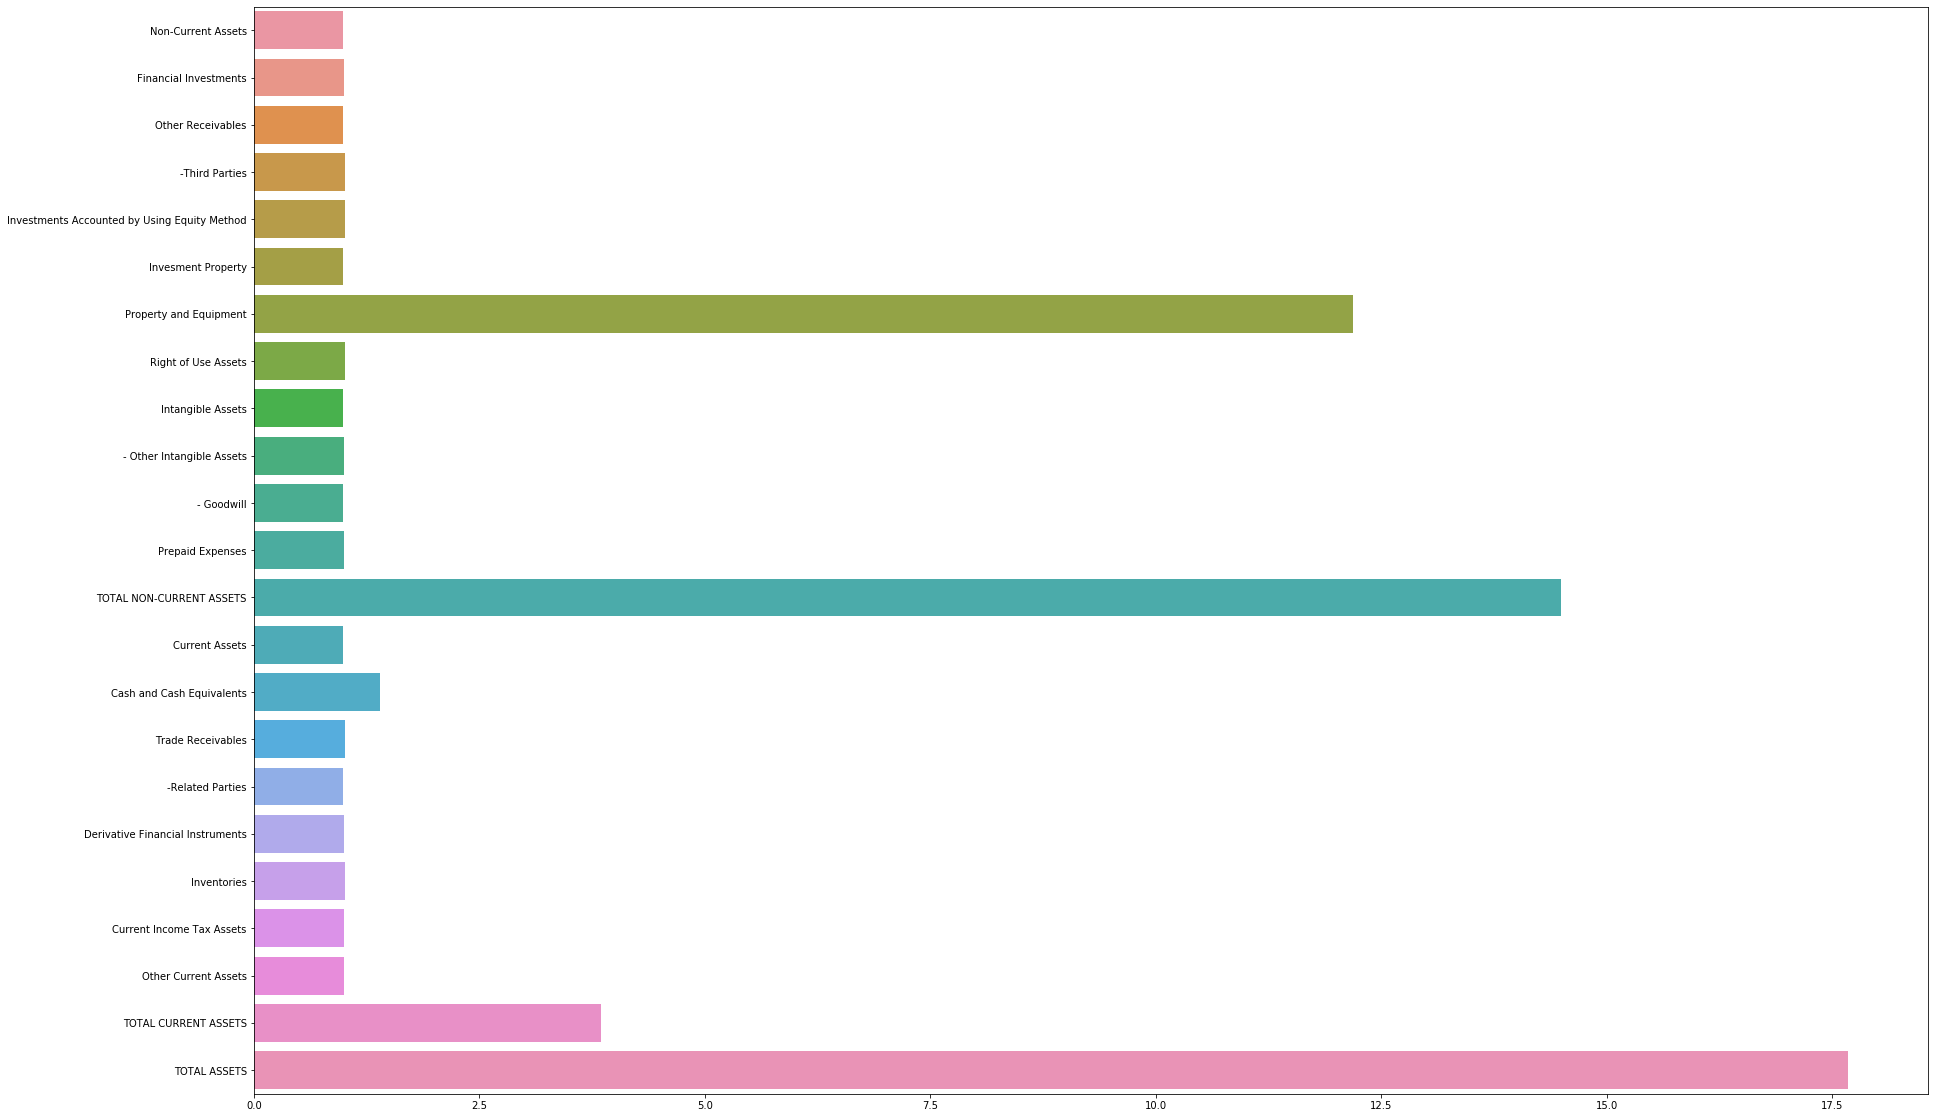

In [44]:
LOF = LocalOutlierFactor(n_neighbors = 20,metric="manhattan")
LOF.fit_predict(asset_df.T)
scores = -LOF.negative_outlier_factor_


#sns.scatterplot(data = -LOF.negative_outlier_factor_)

lof_score = {}

for column,score in zip(asset_df.columns,scores):
    lof_score.update({column:score})

lof_score_asset = pd.DataFrame(lof_score,index=['Scores'])
lof_score_asset
plt.figure(figsize=(30,20))
sns.barplot(data = lof_score_asset,orient='h')

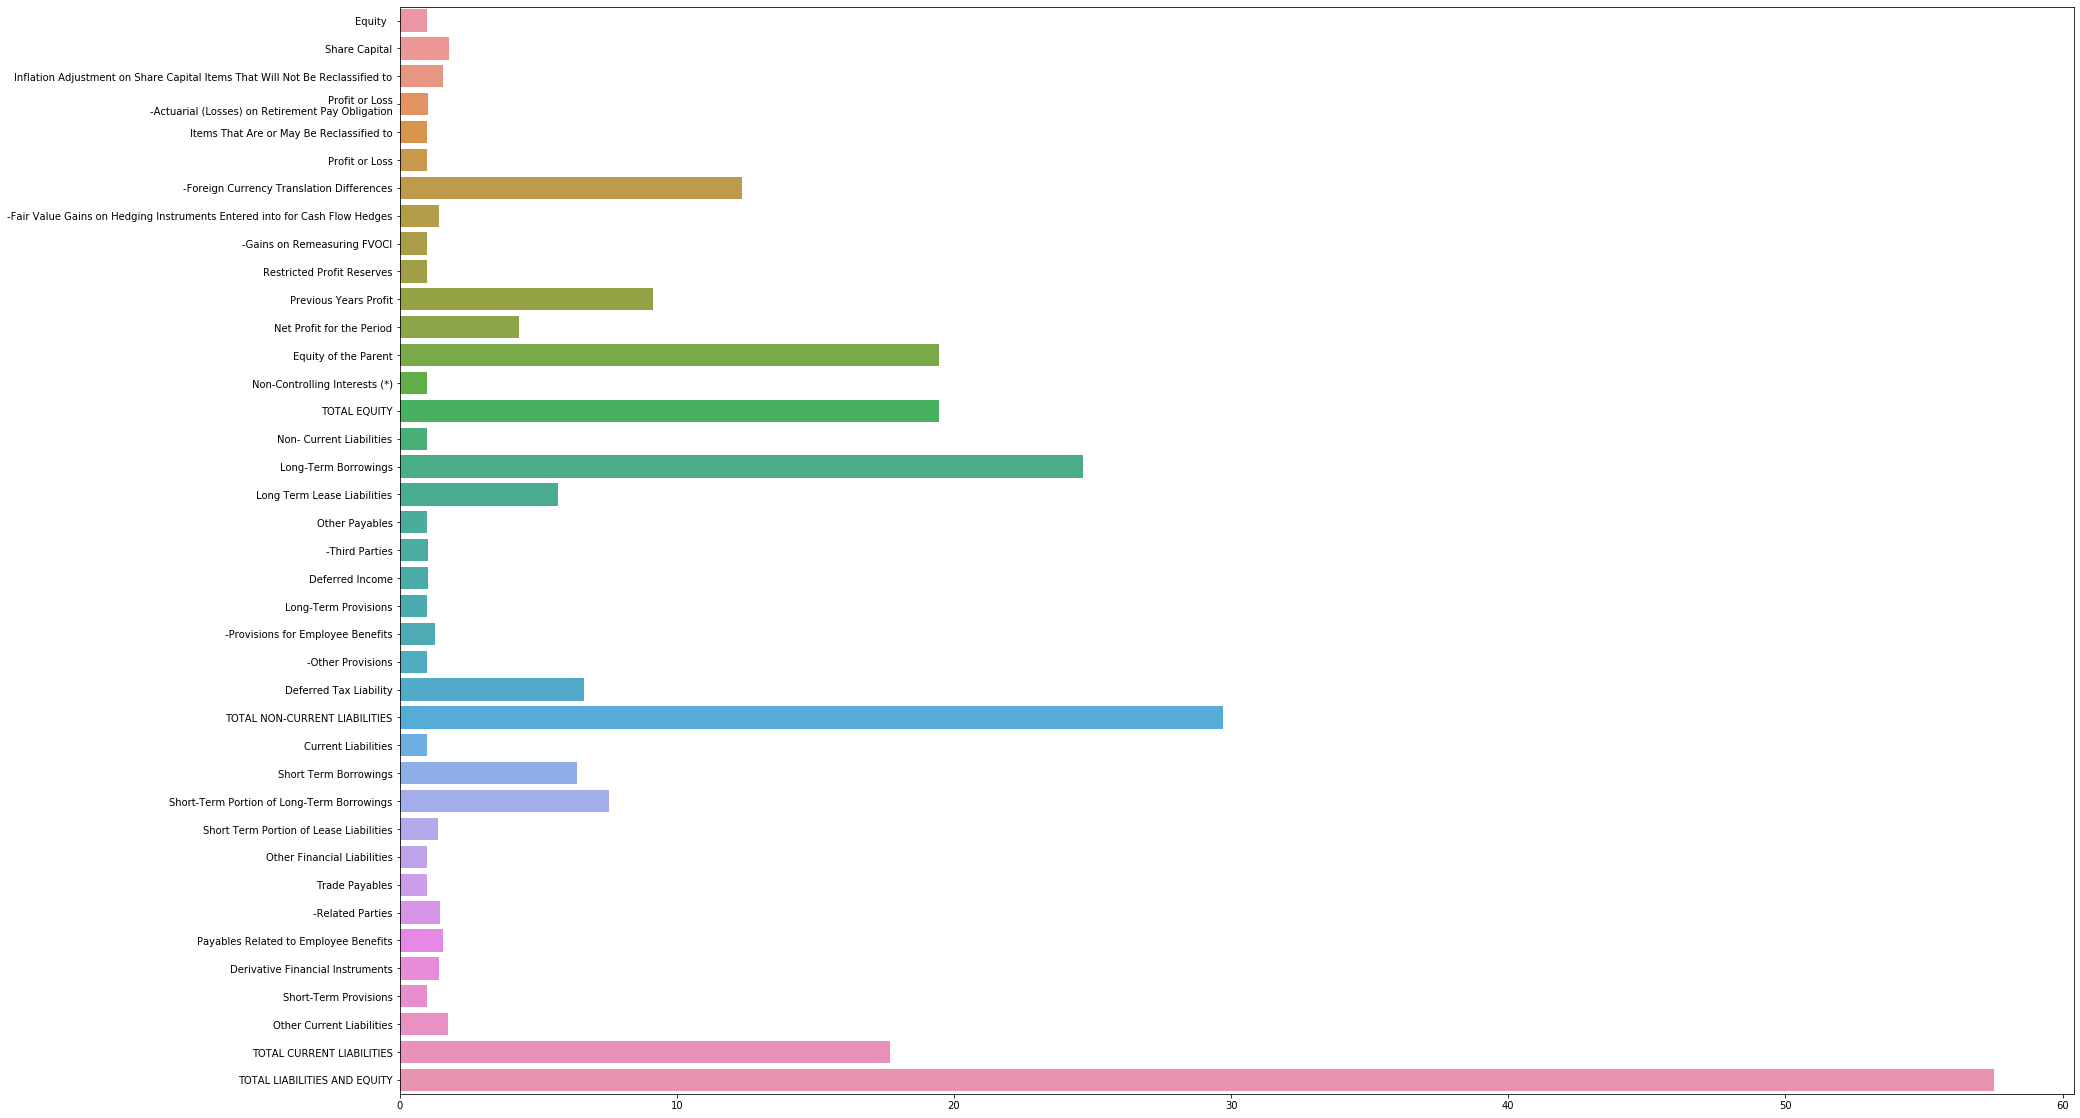

In [37]:
LOF = LocalOutlierFactor(n_neighbors = 20,metric="manhattan")
LOF.fit_predict(liabilites_df.T)
scores = -LOF.negative_outlier_factor_


# sns.scatterplot(data = -LOF.negative_outlier_factor_)

lof_score = {}

for column,score in zip(liabilites_df.columns,scores):
    lof_score.update({column:score})

lof_score_liabilities = pd.DataFrame(lof_score,index=['Scores'])
lof_score_liabilities
plt.figure(figsize=(30,20))
sns.barplot(data = lof_score_liabilities,orient='h')

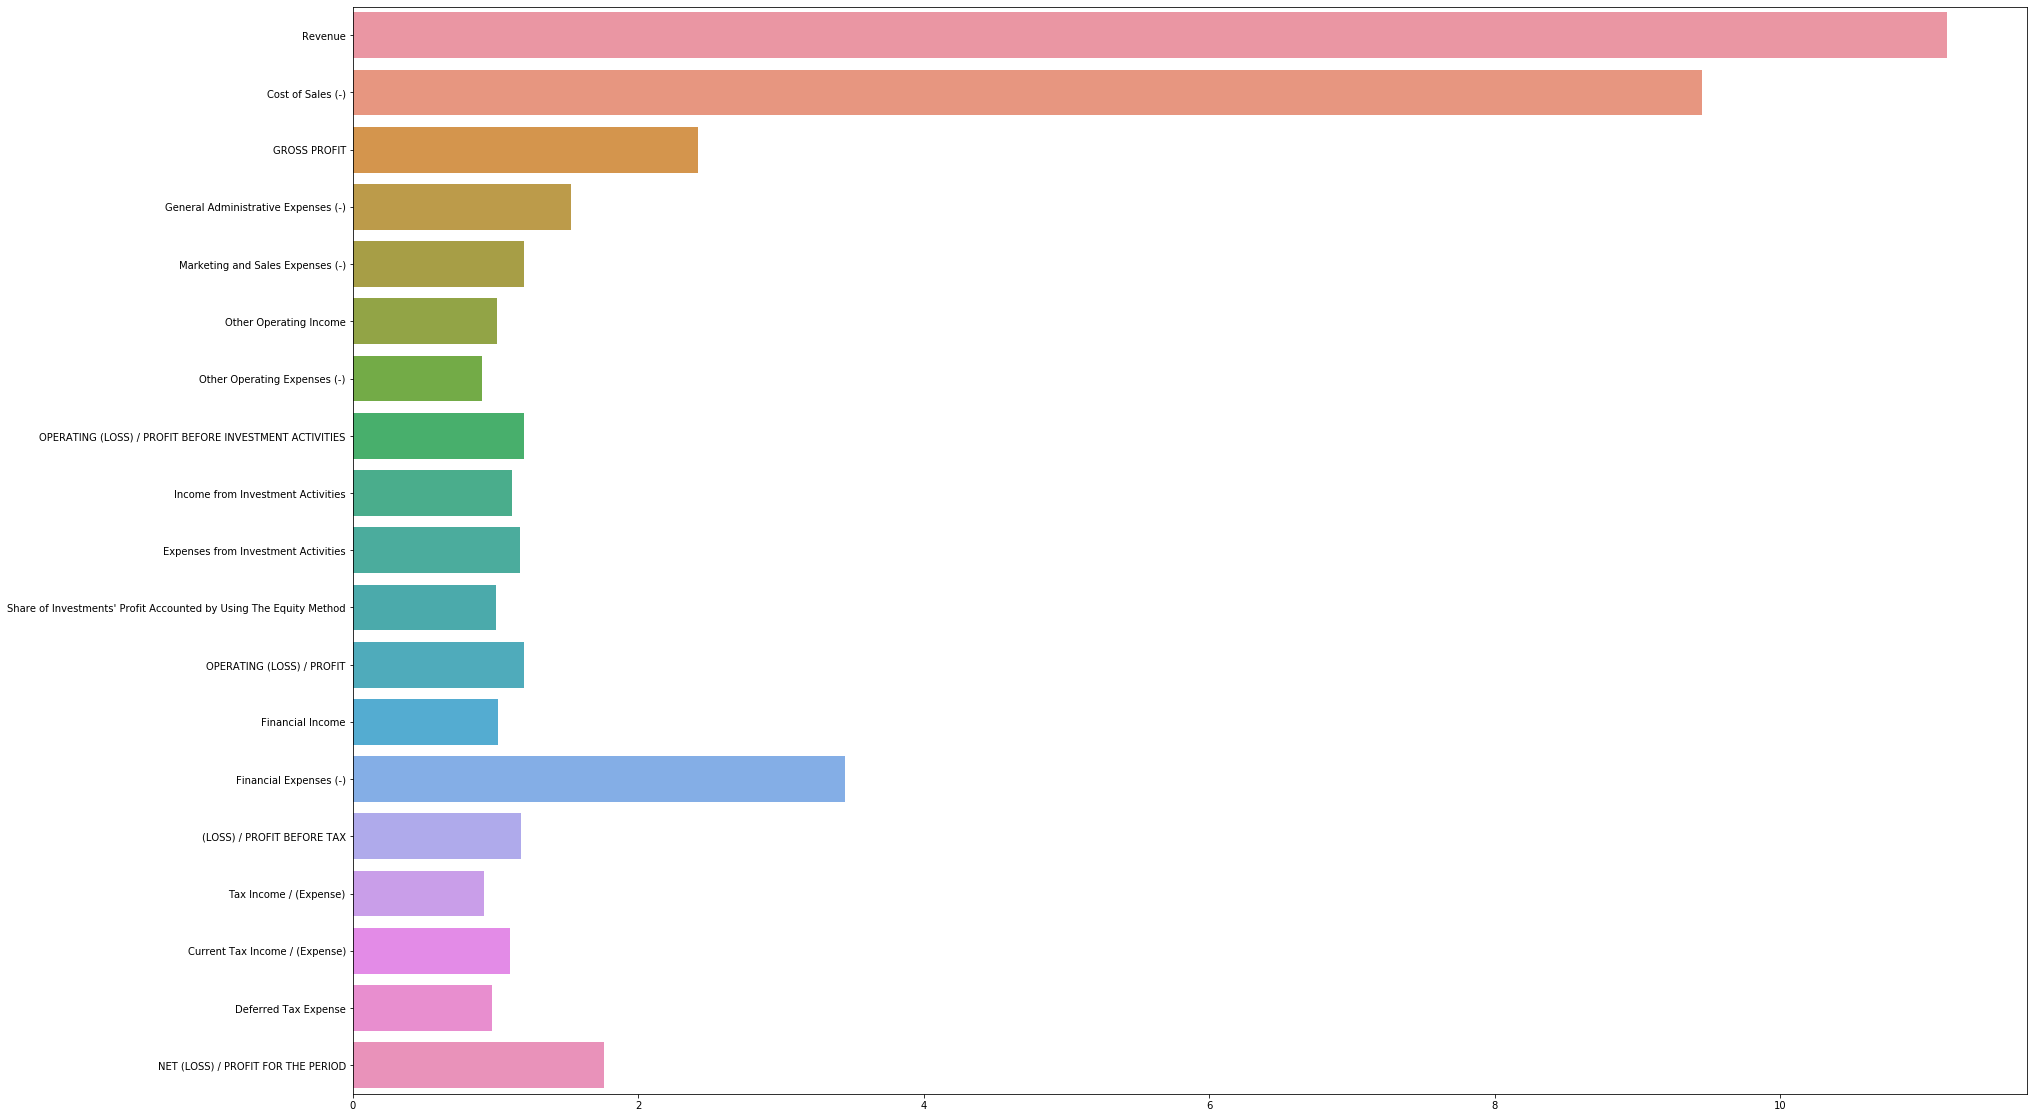

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

LOF = LocalOutlierFactor(n_neighbors = 5,metric="manhattan")
LOF.fit_predict(income_df.T.iloc[1:,:])
scores = -LOF.negative_outlier_factor_

#sns.scatterplot(data = -LOF.negative_outlier_factor_,legend=False)

lof_score = {}

for column,score in zip(income_df.columns[1:],scores):
    lof_score.update({column:score})

lof_score_assets = pd.DataFrame(lof_score,index=['Scores'])
lof_score_assets
plt.figure(figsize=(30,20))
sns.barplot(data = lof_score_assets,orient='h')

In [39]:
#import numpy as np
#asset_df = asset_df.replace(0, np.nan)
#asset_df = asset_df.dropna(axis=1)    


In [40]:
ratio_analysis_bs = ratio_analysis_bs.set_index('Date')
ratio_analysis_bs

,Working Capital,Working Capital per Dollar of Sales,Current Ratio,Quick Current Ratio,Debt to Equity Ratio,Receivable Turnover,Average Age of Receivables,Inventory Turnover,Number of Days for Inventory to Turn
Date,,,,,,,,,
30 September 2019,-8659,-8659,0.742115,0.694791,2.610717,0.425984,856.839969,29.023285,12.576109
31 December 2018,-3540,-3540,0.870073,0.833370,2.486639,0.672320,542.896155,34.764000,10.499367


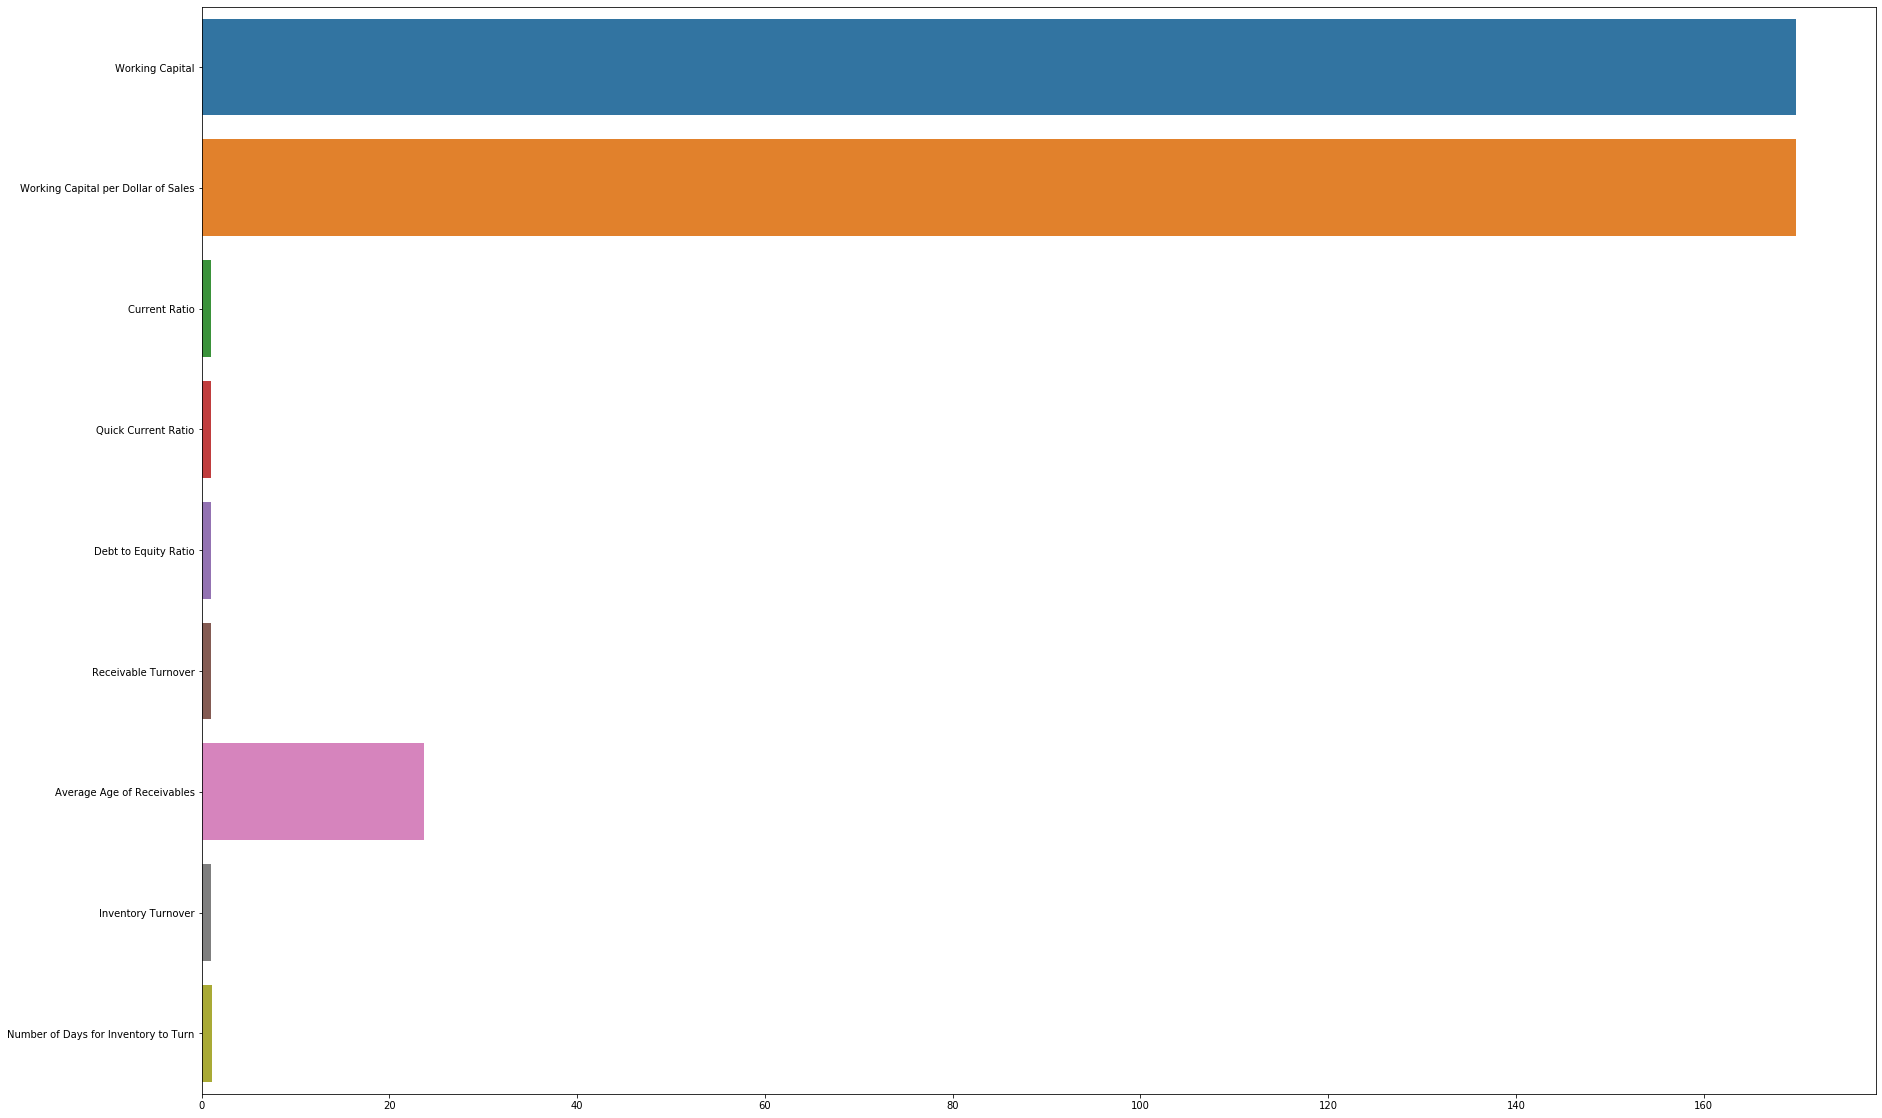

In [41]:
LOF = LocalOutlierFactor(n_neighbors = 5,metric="manhattan")
LOF.fit_predict(ratio_analysis_bs.T)
scores = -LOF.negative_outlier_factor_

#sns.scatterplot(data = -LOF.negative_outlier_factor_,legend=False)

lof_score = {}

for column,score in zip(ratio_analysis_bs.columns,scores):
    lof_score.update({column:score})

lof_score_ratio_bs = pd.DataFrame(lof_score,index=['Scores'])
lof_score_ratio_bs
plt.figure(figsize=(30,20))
sns.barplot(data = lof_score_ratio_bs,orient='h')

In [42]:
ratio_analysis_is = ratio_analysis_is.set_index('Date')
ratio_analysis_is

,Gross Profit Margin,Operating Profit Margin,Net Profit Ratio,Return on Equity,Asset Turnover,Return on Assets
Date,,,,,,
30 September 2019,17.867892,0.066838,0.046072,0.075190,0.414389,0.111181
31 December 2018,25.024263,0.162076,0.088058,0.118671,0.425089,0.207153


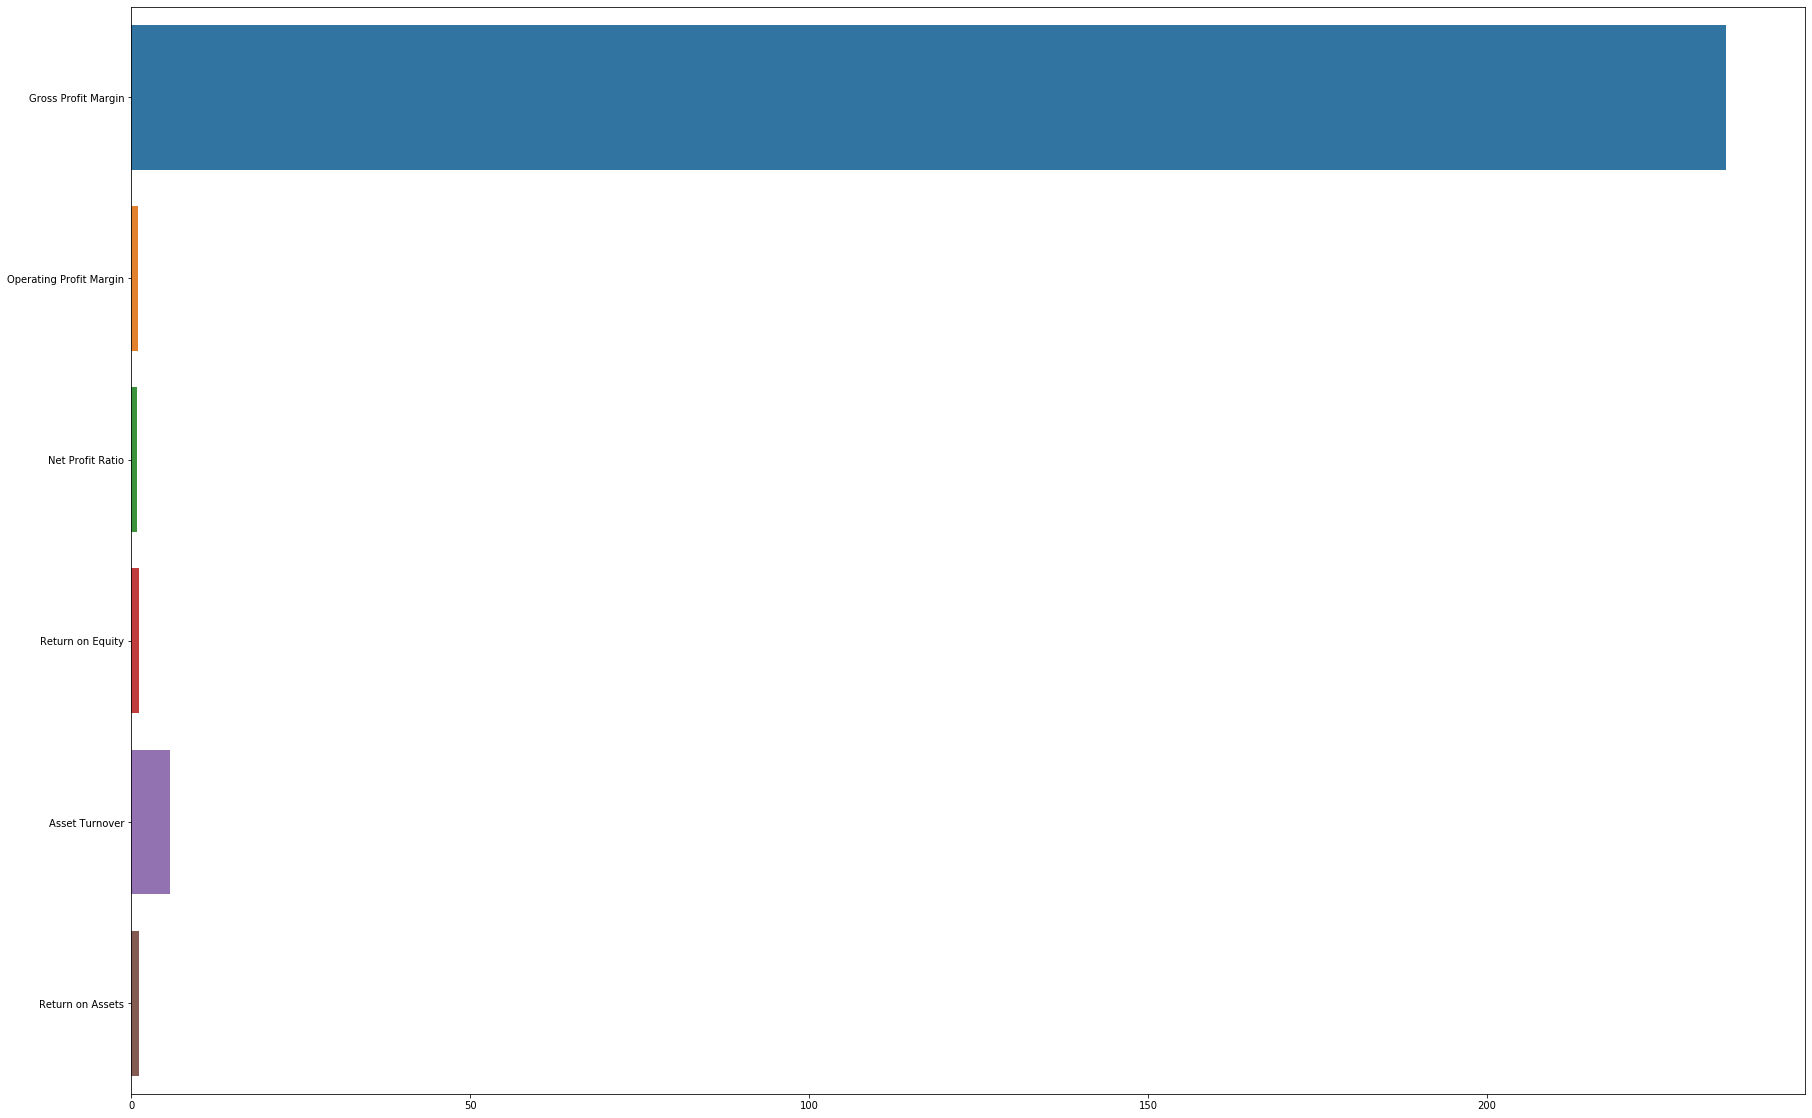

In [43]:
LOF = LocalOutlierFactor(n_neighbors = 2,metric="manhattan")
LOF.fit_predict(ratio_analysis_is.T)
scores = -LOF.negative_outlier_factor_

#sns.scatterplot(data = -LOF.negative_outlier_factor_,legend=False)

lof_score = {}

for column,score in zip(ratio_analysis_is.columns,scores):
    lof_score.update({column:score})

lof_score_ratio_is = pd.DataFrame(lof_score,index=['Scores'])
lof_score_ratio_is
plt.figure(figsize=(30,20))
sns.barplot(data = lof_score_ratio_is,orient='h')